# Import required libraries

In [1]:
import   scipy.stats                      as     stats
import   statsmodels.stats.proportion     as     SMP
import   numpy                            as     np
import   pandas                           as     pd
import   matplotlib.pyplot                as     plt
import   seaborn                          as     sns
from     IPython.display                  import Image
import   statistics

# Recap of EDA

In [3]:
#Enter 3 player score
p1 = np.array([20,18,25,14,8])
p2 = np.array([100,8,25,40,12])
p3 = np.array([65,52,48,38,63])

In [4]:
#ddof read the docstring and refer nb ,we want division by n-1 so ddof =1
print("Average of Player 1:",np.mean(p1),"Standard Deviation of Player 1:",np.std(p1,ddof = 1))
print("Average of Player 2:",np.mean(p2),"Standard Deviation of Player 2:",np.std(p2,ddof = 1))
print("Average of Player 3:",np.mean(p3),"Standard Deviation of Player 1:",np.std(p3,ddof = 1))

Average of Player 1: 17.0 Standard Deviation of Player 1: 6.4031242374328485
Average of Player 2: 37.0 Standard Deviation of Player 2: 37.376463182061514
Average of Player 3: 53.2 Standard Deviation of Player 1: 11.122050170719424


In [ ]:
#Inference 
#Lesser the standard devaition more the consistency
#We need to take the decision whether the consistency is poor or rich
#Player 1 is performing consistently poor 

In [ ]:
#TO find out the consistency
#The appropriate parameter is Coefficient of varaince (CV)
#Formula : CV  =  standard deviation/mod of mean
#          CV% =  (standard deviation/mod of mean)*100

In [7]:
#calculating the CV of all the players
cv_p1 = 6.40/17.0
cv_p2 = 37.37/37.0
cv_p3 = 53.2/11.12

In [9]:
print("Percentage Coefficient of Variance for player 1: ",cv_p1*100)
print("Percentage Coefficient of Variance for player 2: ",cv_p2*100)
print("Percentage Coefficient of Variance for player 3: ",cv_p3*100)

Percentage Coefficient of Variance for player 1:  37.64705882352941
Percentage Coefficient of Variance for player 2:  101.0
Percentage Coefficient of Variance for player 3:  478.4172661870504


In [ ]:
#Inference
#higher the percentage more fluctuating is the performance of the player(more risker the player is)


# Binomial Distribution

In [29]:
#LED BULB PROBLEM
p = 0.05       # Failure rate for LED light bulbs that the company manufactures is 5%
n = 10         #sample size or trials
x = np.arange(0,n)

In [30]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
binomial = stats.binom.pmf(x,n,p)

In [32]:
binomial

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789063e-08,
       1.58642578e-09, 1.85546875e-11])

In [ ]:
#binomial[10] indicates that probability that all bulbs are defective is almost 0
#because historical data tell 95% of bulbs are good bulbs

In [33]:
#a) None of the LED BULBS are defective
print("Probaility that none of LED BULBS are defective:",binomial[0])

Probaility that none of LED BULBS are defective: 0.5987369392383789


In [34]:
#b) Exactly 1 of the LED Bulb is defective
print("Probability that exactly 1 Bulb is defective:",binomial[1])

Probability that exactly 1 Bulb is defective: 0.31512470486230504


In [35]:
#c)2 or fewer bulb are defective  #p(X<=2)
print("Probaility that 2 or fewer bulb are defective:",binomial[0]+binomial[1]+binomial[2])


Probaility that 2 or fewer bulb are defective: 0.9884964426207035


In [36]:
#solution 2: use cumulative density function
cumbinomail = stats.binom.cdf(x,n,p)

In [37]:
cumbinomail

array([0.59873694, 0.91386164, 0.98849644, 0.9989715 , 0.99993631,
       0.99999725, 0.99999992, 1.        , 1.        , 1.        ])

In [24]:
print("Probaility that 2 or fewer bulb are defective:",cumbinomail[2])

Probaility that 2 or fewer bulb are defective: 0.9884964426207031


In [25]:
#d) Three or more LED bulbs are defective P(X >= 3)
#P(X >= 3) = 1 - P(X < 3)
d3_more = 1 - cumbinomail[2]    #cumbinomail[2]  = P(X=0)+P(X=1)+P(X=2)
print("Probability that 3 or more bulbs are defective:" , d3_more)

Probability that 3 or more bulbs are defective: 0.01150355737929687


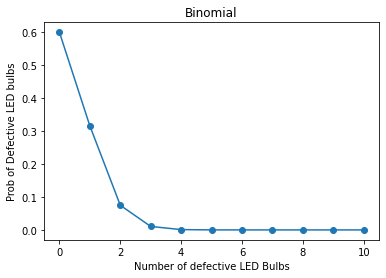

In [26]:
#Binomial distribution plot
plt.plot(x,binomial,"o-")
plt.title("Binomial")
plt.xlabel("Number of defective LED Bulbs")
plt.ylabel("Prob of Defective LED bulbs")
plt.show()

In [ ]:
#Probability of all bulbs being defectful is 0 P(X = 10)

In [27]:
#highest point
np.max(binomial)

0.5987369392383789

In [28]:
#index of highest point
#probaility of none of the bulb being defective
np.argmax(binomial)

0

# Day2


In [ ]:
#bank problem nb(bank loan defaulter example)

In [15]:
p = 0.6    #customers paying EMI on time
n = 7      #sample size or trials
x = np.arange(0,n)

In [16]:
bank_binom = stats.binom.pmf(x,n,p)

In [17]:
bank_binom

array([0.0016384, 0.0172032, 0.0774144, 0.193536 , 0.290304 , 0.2612736,
       0.1306368])

In [20]:
len(bank_binom)

7

In [19]:
#np.argmax() will return the index of the highest element
np.argmax(bank_binom)

4

In [18]:
#np.max() will return the max value in the array
np.max(bank_binom)

0.2903040000000001

In [ ]:
#Inference probability that 4 customers on time has highest probability

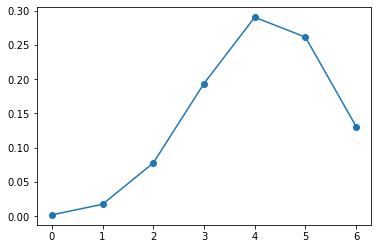

In [21]:
#graphical representation
#at 4 we have got max probab that is 29%
plt.plot(x,bank_binom,"o-")

In [22]:
#Logical calculation
#Mean calculation
#60% of 7 cust
#Mean of binomial distribution = n*p
mu = 0.60*7
print("MEAN OF BINOMIAL DISTRIBUTION",mu)

MEAN OF BINOMIAL DISTRIBUTION 4.2


In [23]:
#standard deviation of binomial distribution = sqrt(n*p*(1-p))
sd = np.sqrt(7*0.60*0.40)
print("STANDARD DEVIATION OF BINOMIAL DISTRIBUTION:",sd)

STANDARD DEVIATION OF BINOMIAL DISTRIBUTION: 1.2961481396815722


In [24]:
#using mean and standard deviation we are telling the final inference
#As an average 4.2 customer paying on time with fluctuation of +1.29 or -1.29
Lower_Limit = 4.2-1.29
Upper_Limit = 4.2+1.29
print("LOWER LIMIT:",Lower_Limit,"UPPER_LIMIT:",Upper_Limit)

LOWER LIMIT: 2.91 UPPER_LIMIT: 5.49


In [26]:
#for defaulters
#2-3 customers are defaulters in sample of 7
0.4*7

2.8000000000000003

In [ ]:
#poisson distribution
#2)Cumulative density function
#Example of work related injuries
#lambda = 2.5 injuries

In [27]:
#a)No work relate dinjuries occur
rate     = 2.5 #mean 
n        = np.arange(0,10)  # X- axis theoretically we can take it infinite
poisson  = stats.poisson.pmf(n,rate)

In [28]:
poisson

array([0.082085  , 0.2052125 , 0.25651562, 0.21376302, 0.13360189,
       0.06680094, 0.02783373, 0.00994062, 0.00310644, 0.0008629 ])

In [33]:
print("Probability there is 0 work related injuries:",poisson[0])
print("Probability there is 1 work related injuries:",poisson[1])
print("Probability there is 2 work related injuries:",poisson[2])

Probability there is 0 work related injuries: 0.0820849986238988
Probability there is 1 work related injuries: 0.205212496559747
Probability there is 2 work related injuries: 0.25651562069968376


In [39]:
#a)Probability that there is no work related injuries
print("Probability there is 0 work related injuries: {0:.2f}".format(poisson[0]*100),"%")

Probability there is 0 work related injuries: 8.21 %


In [38]:
#b)Atleast one work related injury occurs
#P(X>=1)
#p(X>=1)  = 1 - P(X<1)
atleast_1 = 1 - poisson[0]
print("Probability that atleast 1 work related injury occurs: {0:.2f}".format(atleast_1*100),"%")

Probability that atleast 1 work related injury occurs: 91.79 %


In [41]:
#solution 2
at_1 = 100 - (poisson[0]*100)
print("Probability that atleast 1 work related injury occurs: {0:.2f}".format(at_1),"%")

Probability that atleast 1 work related injury occurs: 91.79 %


In [ ]:
#EG2 refer notebook
#lambda = 6

In [47]:
#Q1)what p(x=4) arrive in bank at given min?
rate = 6 #mean
n    = np.arange(0,20)

In [48]:
eg2_poisson = stats.poisson.pmf(n,rate)

In [49]:
eg2_poisson

array([2.47875218e-03, 1.48725131e-02, 4.46175392e-02, 8.92350784e-02,
       1.33852618e-01, 1.60623141e-01, 1.60623141e-01, 1.37676978e-01,
       1.03257734e-01, 6.88384890e-02, 4.13030934e-02, 2.25289600e-02,
       1.12644800e-02, 5.19899078e-03, 2.22813891e-03, 8.91255562e-04,
       3.34220836e-04, 1.17960295e-04, 3.93200983e-05, 1.24168732e-05])

In [61]:
print("Probability 4 customer visits bank in a given minute: {0:.2f}".format(eg2_poisson[4]*100),"%")

Probability 4 customer visits bank in a given minute: 13.39 %


In [63]:
#Q2)what is the probability that 3 customer visits the bank at a given minute?
print("Probability 3 customer visits bank in a given minute: {0:.2f}".format(eg2_poisson[3]*100),"%")

Probability 3 customer visits bank in a given minute: 8.92 %


In [65]:
#Q3)for what value of x you have got highest probability
print("Highest Probability:",np.argmax(eg2_poisson))

Highest Probability: 6


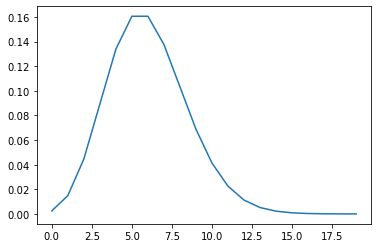

In [66]:
plt.plot(eg2_poisson)

# Normal Distribution

In [ ]:
#cell phone example
#How to figure out problem is for normal distribution ==> 
#if units are given then its a normal distribution

In [67]:
mu     = 68 
sigma  = 12

In [69]:
#Step1 - Calculate the Z-value
z      = (90-mu)/sigma   #X = 90
z

1.8333333333333333

In [81]:
#stats.norm.cdf will give area to the left of point 1.83 
#But we want area right of 1.83
#a) what proportion of the smart phone users are spending more than 90 minutes in sending messages daily?
P = 1 - stats.norm.cdf(z)
print("Portion of smart phone users are spending more than 90 minutes in sending message daily: {0:1.4f}".format(P*100),"%")

Portion of smart phone users are spending more than 90 minutes in sending message daily: 3.3377 %


In [83]:
#Exact mean value
z      = (68-mu)/sigma   #X = 68
z

0.0

In [86]:
P = 1 - stats.norm.cdf(z)    # for mean u put 1 -      stats.norm.cdf(z) or stats.norm.cdf(z) it is same
#P = stats.norm.cdf(z)       # same as above
print("Portion of smart phone users are spending more than 90 minutes in sending message daily: {0:1.4f}".format(P*100),"%")

Portion of smart phone users are spending more than 90 minutes in sending message daily: 50.0000 %


In [87]:
#b) What proportion of customers are  spending less than 20 minutes?
z1 = (20 - mu)/sigma  #X  = 20
print("Z-scaled Value:",z1)
P  = stats.norm.cdf(-4)
print("Proportion of customers are spending less than 20 minutes: {0:1.3f}".format(P*100),"%")

Z-scaled Value: -4.0
Proportion of customers are spending less than 20 minutes: 0.003 %


In [96]:
#c)What proportion of customers are spending between 50 minutes to 100 minutes ?
z1 = (50 - mu)/sigma
z2 = (100 - mu)/sigma
print("Z-scaled value for 50:",z1)
print("Z-scaled value for 100:",z2)
P1 = stats.norm.cdf(z1)
P2 = stats.norm.cdf(z2)
P  = P2 - P1
print("Proportion of customers spending between 50 minutes and 100 minutes is: {0:.2f}".format(P*100),"%")

Z-scaled value for 50: -1.5
Z-scaled value for 100: 2.6666666666666665
Proportion of customers spending between 50 minutes and 100 minutes is: 92.94 %


In [ ]:
#Framed ques
#Mean weight of chips packed is 295 grams with standard deviation of 25 grams
#a)What is the probab ,weight < 280 gms
#b)What probab , weight > 350 gms
#c) what proba ,weight > 260 and weight < 340

In [99]:
#a)
mu , sigma  = 295 , 25
z  = (280 - mu)/sigma
z
stats.norm.cdf(z)

0.2742531177500736

In [110]:
#b
z  = (350 - mu)/sigma
print(z)
1 - stats.norm.cdf(z)

2.2


0.01390344751349859

In [109]:
#c)
z1  = (260 - mu)/sigma
z2  = (340 - mu)/sigma
print(z1," ",z2)
P2 = stats.norm.cdf(z2) 
P1 = stats.norm.cdf(z1)
P  = P2 - P1
P

-1.4   1.8


0.8833130216533032

12